# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

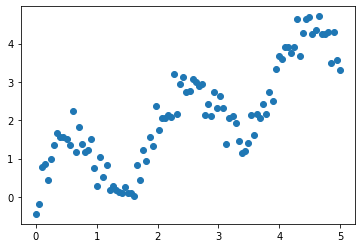

In [6]:
plt.scatter(x,y)

#### nonlinear

In [3]:
regr_lin = LinearRegression()

In [4]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [5]:
regr_lin.fit(X,y)

LinearRegression()

0.6426978014149928


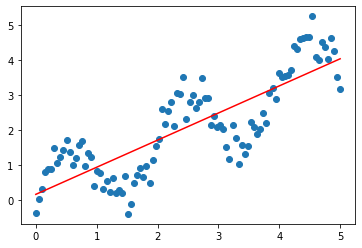

In [6]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [7]:
print(x.shape)

(100,)


In [8]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [9]:
regr_poly = LinearRegression()

In [10]:
regr_poly.fit(X_poly, y)

LinearRegression()

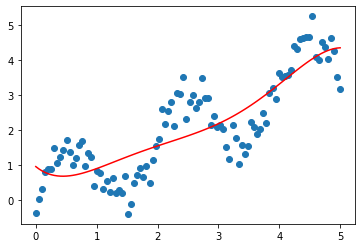

In [11]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [12]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.41856503  2.23770528 -1.10105042  0.24402193 -0.01930462]
interception:  0.9547887800504489


In [13]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.95478878, 0.88871167, 0.83322123, 0.7875226 , 0.7508575 ,
       0.72250348, 0.70177315, 0.68801339, 0.68060466, 0.67896017,
       0.68252514, 0.69077607, 0.70321993, 0.71939343, 0.73886225,
       0.76122026, 0.78608882, 0.81311593, 0.84197554, 0.87236677,
       0.90401312, 0.93666175, 0.97008269, 1.0040681 , 1.03843148,
       1.07300694, 1.10764843, 1.14222895, 1.17663984, 1.21078998,
       1.24460504, 1.27802672, 1.31101198, 1.3435323 , 1.37557289,
       1.40713197, 1.43821996, 1.46885875, 1.49908091, 1.528929  ,
       1.5584547 , 1.58771813, 1.61678709, 1.64573624, 1.67464639,
       1.70360371, 1.73269899, 1.76202686, 1.79168506, 1.82177364,
       1.85239421, 1.8836492 , 1.91564106, 1.94847156, 1.98224095,
       2.01704727, 2.05298553, 2.09014702, 2.12861845, 2.16848129,
       2.20981094, 2.252676  , 2.29713751, 2.34324815, 2.39105155,
       2.44058145, 2.49186099, 2.54490195, 2.59970395, 2.65625372,
       2.71452433, 2.77447444, 2.83604752, 2.8991711 , 2.96375

In [14]:
regr_poly.predict(X_poly)

array([0.95478878, 0.88871167, 0.83322123, 0.7875226 , 0.7508575 ,
       0.72250348, 0.70177315, 0.68801339, 0.68060466, 0.67896017,
       0.68252514, 0.69077607, 0.70321993, 0.71939343, 0.73886225,
       0.76122026, 0.78608882, 0.81311593, 0.84197554, 0.87236677,
       0.90401312, 0.93666175, 0.97008269, 1.0040681 , 1.03843148,
       1.07300694, 1.10764843, 1.14222895, 1.17663984, 1.21078998,
       1.24460504, 1.27802672, 1.31101198, 1.3435323 , 1.37557289,
       1.40713197, 1.43821996, 1.46885875, 1.49908091, 1.528929  ,
       1.5584547 , 1.58771813, 1.61678709, 1.64573624, 1.67464639,
       1.70360371, 1.73269899, 1.76202686, 1.79168506, 1.82177364,
       1.85239421, 1.8836492 , 1.91564106, 1.94847156, 1.98224095,
       2.01704727, 2.05298553, 2.09014702, 2.12861845, 2.16848129,
       2.20981094, 2.252676  , 2.29713751, 2.34324815, 2.39105155,
       2.44058145, 2.49186099, 2.54490195, 2.59970395, 2.65625372,
       2.71452433, 2.77447444, 2.83604752, 2.8991711 , 2.96375

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [15]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [16]:
sigma = 0.3

In [17]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [18]:
regr_rbf = LinearRegression()

In [19]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

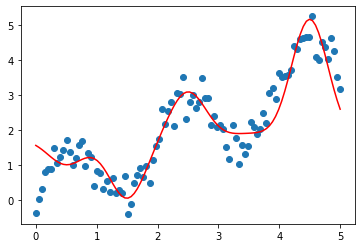

In [20]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [21]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.73039615 -1.6992658   1.35862408  0.14840395  3.43308973]
interception:  1.7442470764133804


#### Comparison

In [22]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

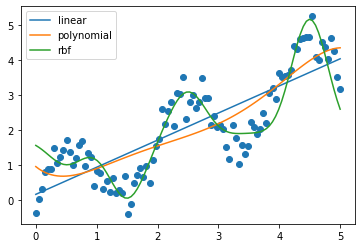

In [23]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [24]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.6426978014149928


In [25]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5765568755775257


In [26]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.27031500990253526
